### Exp0 analysis 

Comparison of 1ng for Eclipse and ASTRAL

In [8]:
#Importing packages 
import pandas as pd 
import numpy as np
import os 
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import mstats
import dask.dataframe as dd
sns.set_style("ticks")

myColors = ["#7400b8","#6930c3","#5e60ce","#5390d9","#4ea8de","#48bfe3","#56cfe1","#64dfdf","#72efdd","#80ffdb"]

In [9]:
#Importing data 
eclipse = pd.read_csv("data/Exp0/Eclipse_1ng.tsv",sep = "\t",  decimal =",") 
astral = pd.read_csv("data/Exp0/Astral_1ng.tsv",sep = "\t",  decimal =",") 

#Mark instruments
eclipse["Instrument"] = "Eclipse"
astral["Instrument"] = "Astral"

#Combine into tone
df = pd.concat([eclipse,astral])

[Text(0.5, 1.0, 'Peptides')]

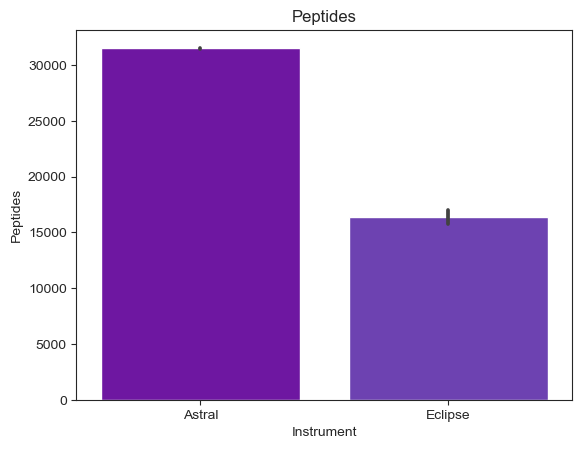

In [10]:
#Plotting barplots for coverage
coverage = pd.DataFrame({'Instrument': np.repeat(['Astral', 'Eclipse'], 3),
                         'Peptides' : df.groupby("R.FileName")['R.FileName'].count().values})

sns.barplot(data = coverage, x = "Instrument", y = "Peptides", palette = myColors).set(title="Peptides")

[Text(0.5, 1.0, 'Eclipse')]

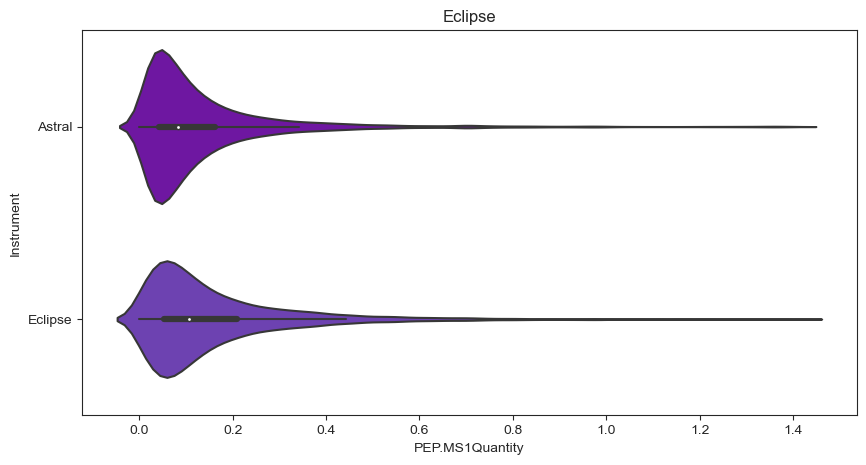

In [11]:
#Calcultating CVs for precision
cvs = df.groupby(['PEP.GroupingKey','Instrument'])['PEP.MS1Quantity'].apply(lambda x: np.std(x)/np.mean(x)).reset_index()

fig, axes = plt.subplots(1,1, figsize=(10, 5))
sns.violinplot(data = cvs, x = "PEP.MS1Quantity", y = 'Instrument', palette = myColors).set(title="Eclipse")

In [12]:
bins = [0, 0.1, 0.2, 1]

cvs['bins'] = pd.cut(cvs['PEP.MS1Quantity'], bins)
cvs.groupby(['Instrument']).bins.value_counts()

Instrument            
Astral      (0.0, 0.1]    16737
            (0.1, 0.2]     6827
            (0.2, 1.0]     5392
Eclipse     (0.0, 0.1]     7479
            (0.1, 0.2]     4460
            (0.2, 1.0]     4455
Name: bins, dtype: int64

In [15]:
#Adding ranks to the dataframe to show abundance dependence on increased IDs
rank = astral.groupby(['PEP.GroupingKey'])['PEP.MS1Quantity'].mean().reset_index()
rank['Found_Eclipse'] = rank['PEP.GroupingKey'].isin(eclipse['PEP.GroupingKey'])

In [14]:
#Uncommnet to save files
#rank.to_csv("data/Exp0/output/rank.tsv",sep = "\t", index = False)
#coverage.to_csv("data/Exp0/output/coverage.tsv",sep = "\t", index = False)
#cvs.to_csv("data/Exp0/output/cvs.tsv",sep = "\t", index = False)